In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [303]:
def sigmoid(z):
    """
    Calculates the sigmoid of z.

    Args:
        z (ndarray): The input to the sigmoid function. 

    Returns:
        ndarray: The sigmoid of z.
    """

    # Prevents the overflow error when computing the exponential function in the sigmoid function
    z = np.clip(z, -500, 500)

    return 1 / (1 + np.exp(-z))


def cost(h, y):
    """
    Calculates the cost of a logistic regression model.

    Args:
        h (ndarray): The hypothesis of the logistic regression model, a numpy array with shape (m, 1), where m is the number of samples.
        y (ndarray): A vector containing the labels of the data, a numpy array with shape (m, 1).

    Returns:
        J (float): The cost of the logistic regression model.
    """

    m = len(y)
    
    # Calculates the cost J using the logistic cost formula
    # Adds a small positive value to h and 1-h to prevent logarithmic errors when computing the cost
    J = (-1 / m) * np.sum(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))
    
    return J

def costfunction(X, y, params):
    """
    Calculates the cost of a logistic regression model using the cost function defined before.

    Args:
        X (ndarray): A feature matrix containing the input data for the logistic regression.
        y (ndarray): A vector containing the labels of the data.
        params (ndarray): A vector of parameters to be optimized in order to minimize the cost function.

    Returns:
        J (float): The cost of the logistic regression model.
    """

    z = np.dot(X, params)
    
    hypothesis = sigmoid(z)
    
    # Calculates the cost using the cost function defined previously 
    J = cost(hypothesis, y)

    return J


def gradient_descent(X, y, params, learning_rate, number_iterations):
    """
    Performs gradient descent to minimize the cost function in logistic regression.
    
    Args:
        X (ndarray): The feature matrix with size (m, n) where m is the number of examples and n is the number of features.
        y (ndarray): The target vector with size (m, 1).
        params (ndarray): The initial values of the parameters with size (n + 1, 1).
        learning_rate (float): The step size for updating the parameters.
        number_iterations (int): The number of iterations to perform gradient descent.
    
    Returns:
        (params, J_history) where params is the optimal parameters and J_history is a list of the cost function values for each iteration.
    """
   
    m = len(y)
    J_history = []
    
    for i in range(number_iterations):
        h = sigmoid(np.dot(X, params))
        
        # Updates the parameters using gradient descent
        params[1:] = params[1:] - (learning_rate/m) * np.dot(X.T, (h - y))[1:]
        # Updates the biais parameters
        params[0] = params[0] - (learning_rate/m) * np.mean(h - y)

        J_history.append(costfunction(X, y, params))
    
    return params, J_history


def logistic_regression(X, y, learning_rate, number_iterations):
    """
    Performs logistic regression to fit a logistic model to the training data.
    
    Args:
        X (ndarray): The feature matrix with size (m, n) where m is the number of examples and n is the number of features.
        y (ndarray): The target vector with size (m, 1).
        learning_rate (float): The step size for updating the parameters.
        number_iterations (int): The number of iterations to perform gradient descent.
    
    Returns:
        (params, J_history) where params is the optimal parameters and J_history is a list of the cost function values for each iteration.
    """
    m, n = X.shape

    # Adds a column of ones to the feature matrix for the intercept term
    X = np.hstack((np.ones((m, 1)), X))

    # Reshapes y to a column vector
    y = y.reshape(m, 1)
    
    # Converts y to floating point numbers if it is not already a float
    if not np.issubdtype(y.dtype, float):
        y = y.astype(float)
    
    params = np.zeros((n + 1, 1))
    
    # Performs gradient descent to minimize the cost function
    params, J_history = gradient_descent(X, y, params, learning_rate, number_iterations)
    
    return params, J_history



def predict(X, params):
    """
    Predicts class labels for a given set of examples X using the learned logistic regression parameters params.

    Args:
        X (ndarray) : A 2D array of shape (m, n), where m is the number of examples, and n is the number of features.
        params (ndarray) : A 1D array of shape (n + 1,), representing the learned logistic regression parameters.

    Returns:
        ndarray : A 1D array of shape (m,), representing the predicted class labels (0 or 1).
    """
    
    m = len(X)

    # Adds a column of ones to X to account for the bias term
    X = np.hstack((np.ones((m, 1)), X))
    
    probas = sigmoid(np.dot(X, params))
    
    return np.where(probas >= 0.5, 1, 0)

def accuracy(y_true, y_pred):
    """
    Calculates the accuracy of a binary classification model.

    Args:
        y_true (ndarray): A vector of true binary labels (0 or 1).
        y_pred (ndarray): A vector of predicted binary labels (0 or 1) generated by the classification model.

    Returns:
        accuracy (float): The accuracy of the binary classification model, a scalar value between 0 and 1.

    """
    
    # Calculates the number of samples that were classified correctly
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    return accuracy


def precision(y_true, y_pred):
    """
    Calculates the precision of a binary classification model.

    Args:
        y_true (ndarray): A vector containing the true labels of the data.
        y_pred (ndarray): A vector containing the predicted labels of the data.

    Returns:
        precision (float): The precision of the binary classification model, a scalar value between 0 and 1.

    """

    # Calculates the number of true positive predictions
    tp = np.sum((y_pred == 1) & (y_true == 1))

    # Calculates the number of true and false positive predictions
    tp_fp = np.sum(y_pred == 1)

    # If the model did not predict any positive instances
    if tp == 0 and tp_fp == 0:
      return 0
    else:
      # Calculates the precision as the number of true positive predictions divided by the number of true and false positive predictions
      precision = tp / tp_fp
      return precision

In [304]:
# Téléchargement des données Heart Failure Prediction
data = pd.read_csv("heart.csv")

# Encodage de données catégoriques par étiquette
label = preprocessing.LabelEncoder()
data["Sex"] = label.fit_transform(data["Sex"])
data["ChestPainType"] = label.fit_transform(data["ChestPainType"])
data["RestingECG"] = label.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label.fit_transform(data["ST_Slope"])

# Vérifier les valeurs manquantes dans toutes les colonnes
for column in data.columns:
    missing_values = data[column].isnull().sum()
    if missing_values > 0:
        missing_percentage = (missing_values / len(data)) * 100
        print(f"Column {column} has {missing_percentage:.2f}% missing values\n")
    else:
        print(f"Column {column} has no missing values\n")

# Diviser les données en caractéristiques et étiquettes
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Diviser le jeu de données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = 42)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#Entraîner le modèle en utilisant les données d'entraînement
learning_rate = 0.01
number_iterations = 100_000
params, J_history = logistic_regression(X_train, y_train, learning_rate, number_iterations)

#Faire des prédictions sur les données de test
y_pred = predict(X_test, params)

y_pred = y_pred.reshape(-1, 1)


Column Age has no missing values

Column Sex has no missing values

Column ChestPainType has no missing values

Column RestingBP has no missing values

Column Cholesterol has no missing values

Column FastingBS has no missing values

Column RestingECG has no missing values

Column MaxHR has no missing values

Column ExerciseAngina has no missing values

Column Oldpeak has no missing values

Column ST_Slope has no missing values

Column HeartDisease has no missing values



In [305]:
# Evaluation du modèle
print("Accuracy : ", accuracy(y_test, y_pred))
print("Accuracy with sickit-learn: ", accuracy_score(y_test, y_pred))
print("Accuracy in percent: %.2f%%" % (accuracy(y_test, y_pred) * 100))
print("\n")
print("Precision: ", precision(y_test, y_pred))
print("Precision with sickit-learn: ", precision_score(y_test, y_pred))
print("Precision in percent: %.2f%%" % (precision(y_test, y_pred) * 100))
print("\n")
print("Recall with sickit-learn: ", recall_score(y_test, y_pred))
print("Recall in percent: %.2f%%" % (recall_score(y_test, y_pred) * 100))

Accuracy :  0.8385093167701864
Accuracy with sickit-learn:  0.8385093167701864
Accuracy in percent: 83.85%


Precision:  0.888268156424581
Precision with sickit-learn:  0.888268156424581
Precision in percent: 88.83%


Recall with sickit-learn:  0.8324607329842932
Recall in percent: 83.25%


Confusion Matrix : 



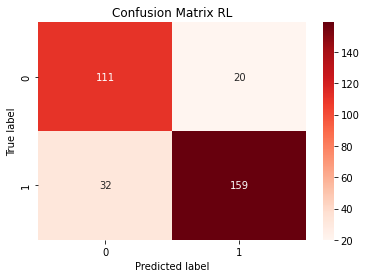

<Figure size 576x432 with 0 Axes>

In [306]:
# Analyse des erreurs
print("Confusion Matrix : \n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=plt.cm.Reds)
plt.title("Confusion Matrix RL")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure(figsize=(8,6))
plt.show()

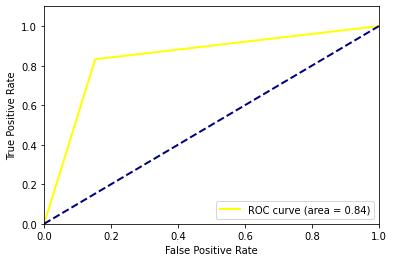

In [307]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='yellow',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


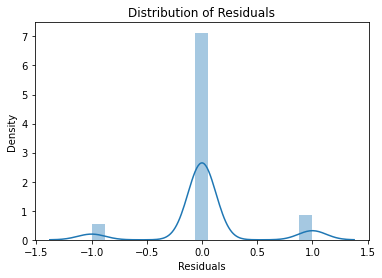

In [308]:
residuals = y_test - y_pred
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [309]:
from sklearn.datasets import load_breast_cancer
from sklearn import datasets

data_cancer = datasets.load_breast_cancer()
X = data_cancer.data
y = data_cancer.target

# Diviser le jeu de données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

#Entraîner le modèle en utilisant les données d'entraînement
learning_rate = 0.01
number_iterations = 100_000
params, J_history = logistic_regression(X_train, y_train, learning_rate, number_iterations)

#Faire des prédictions sur les données de test
y_pred = predict(X_test, params)

y_pred = y_pred.reshape(-1, 1)

In [310]:
# Evaluation du modèle
print("Accuracy : ", accuracy(y_test, y_pred))
print("Accuracy with sickit-learn: ", accuracy_score(y_test, y_pred))
print("Accuracy in percent: %.2f%%" % (accuracy(y_test, y_pred) * 100))
print("\n")
print("Precision: ", precision(y_test, y_pred))
print("Precision with sickit-learn: ", precision_score(y_test, y_pred))
print("Precision in percent: %.2f%%" % (precision(y_test, y_pred) * 100))
print("\n")
print("Recall with sickit-learn: ", recall_score(y_test, y_pred))
print("Recall in percent: %.2f%%" % (recall_score(y_test, y_pred) * 100))

Accuracy :  0.9649122807017544
Accuracy with sickit-learn:  0.9649122807017544
Accuracy in percent: 96.49%


Precision:  0.971830985915493
Precision with sickit-learn:  0.971830985915493
Precision in percent: 97.18%


Recall with sickit-learn:  0.971830985915493
Recall in percent: 97.18%


Confusion Matrix : 



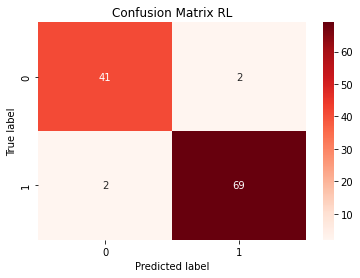

<Figure size 576x432 with 0 Axes>

In [311]:
# Analyse des erreurs
print("Confusion Matrix : \n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=plt.cm.Reds)
plt.title("Confusion Matrix RL")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure(figsize=(8,6))
plt.show()

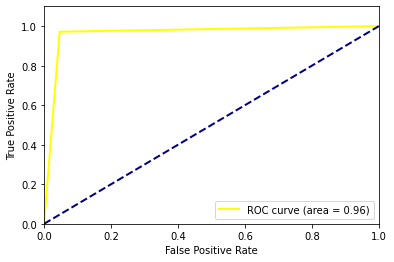

In [312]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='yellow',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


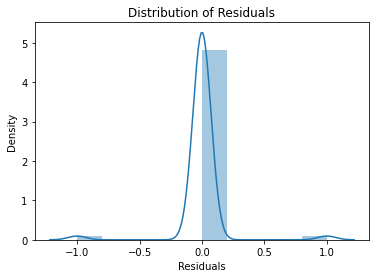

In [313]:
residuals = y_test - y_pred
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()